In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn


In [49]:
dataframe=pd.read_csv('alzheimer.csv')

In [50]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [51]:
dataframe.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

<Axes: xlabel='Group', ylabel='count'>

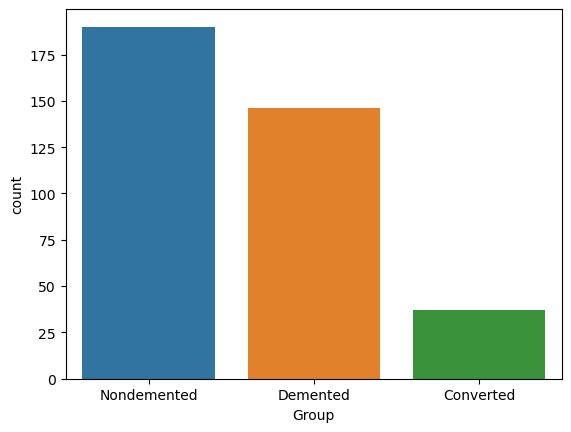

In [52]:
sbn.countplot(x=dataframe["Group"])

In [53]:
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

In [54]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [55]:
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [57]:
evre=dataframe.iloc[:,0:1].values

In [58]:
evre

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [59]:
dataframe['Group'] = dataframe['Group'].map({'Nondemented': 0, 'Converted': 1, 'Demented': 2})

In [60]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,2,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,2,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,2,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,2,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [61]:
dataframe['M/F'] = dataframe['M/F'].map({'M': 0, 'F': 1})

In [62]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,2,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,2,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,2,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,2,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = dataframe.drop('Group', axis=1)

In [65]:
x

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [66]:
y=dataframe["Group"]

In [67]:
y

0      0
1      0
2      2
3      2
4      2
      ..
368    2
369    2
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()

In [71]:
X_train=sc.fit_transform(x_train)

In [72]:
x_test=sc.transform(x_test)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
model = Sequential()

model.add(Dense(64, activation = "relu",input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(8 ,activation  = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam",loss ="mse", metrics=['mae'])

In [75]:
model.fit(x = x_train, y =y_train, epochs = 300,validation_data = (x_test,y_test),batch_size=32)

Epoch 1/300
8/8 [==============================] - 1s 30ms/step - loss: 32048.0918 - mae: 159.3152 - val_loss: 1.7865 - val_mae: 0.9896
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 1705.4895 - mae: 37.7836 - val_loss: 1.6915 - val_mae: 0.9481
Epoch 3/300
8/8 [==============================] - 0s 8ms/step - loss: 1713.4750 - mae: 40.0269 - val_loss: 1.6891 - val_mae: 0.9422
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 106.2550 - mae: 8.7984 - val_loss: 1.7009 - val_mae: 0.9434
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 312.7989 - mae: 17.3353 - val_loss: 1.6937 - val_mae: 0.9400
Epoch 6/300
8/8 [==============================] - 0s 10ms/step - loss: 63.2217 - mae: 6.4210 - val_loss: 1.6787 - val_mae: 0.9349
Epoch 7/300
8/8 [==============================] - 0s 10ms/step - loss: 44.7452 - mae: 6.3833 - val_loss: 1.6750 - val_mae: 0.9335
Epoch 8/300
8/8 [==============================] - 0s 9ms/step - loss: 21

Epoch 64/300
8/8 [==============================] - 0s 8ms/step - loss: 1.7879 - mae: 1.0612 - val_loss: 1.6739 - val_mae: 0.9304
Epoch 65/300
8/8 [==============================] - 0s 9ms/step - loss: 1.7535 - mae: 1.0531 - val_loss: 1.6739 - val_mae: 0.9303
Epoch 66/300
8/8 [==============================] - 0s 9ms/step - loss: 1.7434 - mae: 1.0521 - val_loss: 1.6738 - val_mae: 0.9302
Epoch 67/300
8/8 [==============================] - 0s 8ms/step - loss: 1.7397 - mae: 1.0525 - val_loss: 1.6737 - val_mae: 0.9302
Epoch 68/300
8/8 [==============================] - 0s 8ms/step - loss: 1.7278 - mae: 1.0461 - val_loss: 1.6736 - val_mae: 0.9301
Epoch 69/300
8/8 [==============================] - 0s 9ms/step - loss: 1.7218 - mae: 1.0450 - val_loss: 1.6734 - val_mae: 0.9300
Epoch 70/300
8/8 [==============================] - 0s 9ms/step - loss: 1.7462 - mae: 1.0502 - val_loss: 1.6734 - val_mae: 0.9299
Epoch 71/300
8/8 [==============================] - 0s 7ms/step - loss: 1.7280 - mae: 1.04

Epoch 127/300
8/8 [==============================] - 0s 8ms/step - loss: 1.3010 - mae: 0.9106 - val_loss: 1.6670 - val_mae: 0.9257
Epoch 128/300
8/8 [==============================] - 0s 9ms/step - loss: 1.3244 - mae: 0.9182 - val_loss: 1.6666 - val_mae: 0.9255
Epoch 129/300
8/8 [==============================] - 0s 8ms/step - loss: 1.2924 - mae: 0.9210 - val_loss: 1.6668 - val_mae: 0.9256
Epoch 130/300
8/8 [==============================] - 0s 7ms/step - loss: 1.3644 - mae: 0.9461 - val_loss: 1.6663 - val_mae: 0.9254
Epoch 131/300
8/8 [==============================] - 0s 7ms/step - loss: 1.3315 - mae: 0.9438 - val_loss: 1.6664 - val_mae: 0.9254
Epoch 132/300
8/8 [==============================] - 0s 7ms/step - loss: 1.3115 - mae: 0.9337 - val_loss: 1.6663 - val_mae: 0.9254
Epoch 133/300
8/8 [==============================] - 0s 8ms/step - loss: 1.3116 - mae: 0.9084 - val_loss: 1.6659 - val_mae: 0.9252
Epoch 134/300
8/8 [==============================] - 0s 10ms/step - loss: 1.4045 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.9831 - mae: 0.8237 - val_loss: 1.6575 - val_mae: 0.9225
Epoch 190/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9590 - mae: 0.8075 - val_loss: 1.6571 - val_mae: 0.9224
Epoch 191/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9227 - mae: 0.7955 - val_loss: 1.6572 - val_mae: 0.9224
Epoch 192/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9130 - mae: 0.7884 - val_loss: 1.6568 - val_mae: 0.9223
Epoch 193/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9462 - mae: 0.8048 - val_loss: 1.6569 - val_mae: 0.9223
Epoch 194/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9193 - mae: 0.8035 - val_loss: 1.6568 - val_mae: 0.9223
Epoch 195/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9457 - mae: 0.8063 - val_loss: 1.6565 - val_mae: 0.9222
Epoch 196/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9232 - mae: 0.7933 - v

8/8 [==============================] - 0s 8ms/step - loss: 0.7210 - mae: 0.7257 - val_loss: 1.6495 - val_mae: 0.9198
Epoch 252/300
8/8 [==============================] - 0s 8ms/step - loss: 0.7085 - mae: 0.7167 - val_loss: 1.6490 - val_mae: 0.9196
Epoch 253/300
8/8 [==============================] - 0s 6ms/step - loss: 0.7049 - mae: 0.6977 - val_loss: 1.6488 - val_mae: 0.9196
Epoch 254/300
8/8 [==============================] - 0s 7ms/step - loss: 0.7071 - mae: 0.7236 - val_loss: 1.6489 - val_mae: 0.9196
Epoch 255/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6958 - mae: 0.7047 - val_loss: 1.6486 - val_mae: 0.9195
Epoch 256/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6943 - mae: 0.7048 - val_loss: 1.6484 - val_mae: 0.9195
Epoch 257/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6705 - mae: 0.6981 - val_loss: 1.6481 - val_mae: 0.9193
Epoch 258/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6736 - mae: 0.7034 - v

In [76]:
loss, mae = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 1.6389 - mae: 0.9157


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
regressor=LinearRegression()

In [79]:
regressor.fit(x_train,y_train)#öğren 

LinearRegression()

In [80]:
y_pred=regressor.predict(x_test)

C:\Users\bilge\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
hastalik=dataframe.iloc[:,0:1].values

In [97]:
gerikalan=dataframe.iloc[:,1:]

In [98]:
x_train,x_test,y_train,y_test=train_test_split(gerikalan,hastalik,test_size=0.33,random_state=0)

In [99]:
r2=LinearRegression()

In [100]:
r2.fit(x_train,y_train)#öğren 

LinearRegression()

In [101]:
y_pred=r2.predict(x_test)

In [102]:
import statsmodels.api as sm

In [103]:
X=np.append(arr=np.ones((373,1)).astype(int),values=gerikalan,axis=1)

In [110]:
x_l=gerikalan.iloc[:,[0,1,2,3,4,6,7,8]].values

In [111]:
x_l=np.array(x_l,dtype=float)

In [112]:
model=sm.OLS(hastalik,x_l).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.696
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                              104.5
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    1.40e-89
Time:                        22:24:35   Log-Likelihood:                         -402.19
No. Observations:                 373   AIC:                                      820.4
Df Residuals:                     365   BIC:                                      851.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4600      0.096     -4.801      0.000      -0.648      -0.272
x2            -0.0106      0.006     -1.751      0.081      -0.023       0.001
x3            -0.0635      0.019     -3.370      0.001      -0.101      -0.026
x4            -0.0789      0.049     -1.619      0.106      -0.175       0.017
x5            -0.1224      0.012    -10.546      0.000      -0.145      -0.100
x6             0.0026      0.000      5.934      0.000       0.002       0.003
x7            -3.8871      1.349     -2.881      0.004      -6.540      -1.234
x8             4.5429      0.561      8.094      0.000       3.439       5.647
==============================================================================
Omnibus:                       30.836   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.184
Skew:                           0.338   Prob(JB):                     0.000306
Kurtosis:                       2.236   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,mean_absolute_error 

In [129]:
r_2 = r2_score(y_test, y_pred)

In [130]:
r_2*100

70.56993770283157

In [131]:
mse = mean_squared_error(y_test, y_pred)

In [132]:
mse

0.25500567116621686

In [133]:
mae = mean_absolute_error(y_test, y_pred)

In [134]:
mae

0.4195249940135934

In [135]:
rmse = np.sqrt(mse)

In [136]:
rmse

0.5049808621781788